In [1]:
# Please execute/shift-return this cell everytime you run the notebook.  Don't edit it. 
%load_ext autoreload
%autoreload 2
from notebook import * 

/nfshome/htseng/courses/CSE142/demo/amdahlslaw/notebook.py:229: SyntaxWarning: invalid escape sequence '\s'
  show = (f"[\s\*]{show}\s*\(", "^\}")
/nfshome/htseng/courses/CSE142/demo/amdahlslaw/notebook.py:229: SyntaxWarning: invalid escape sequence '\s'
  show = (f"[\s\*]{show}\s*\(", "^\}")
/nfshome/htseng/courses/CSE142/demo/amdahlslaw/notebook.py:229: SyntaxWarning: invalid escape sequence '\}'
  show = (f"[\s\*]{show}\s*\(", "^\}")


## Amdahl's Law on parallel programming

In [17]:
! cd vmul; make clean; make
! echo "THREADS,CPUTIME,HOST2GPU,GPUTIME,GPU2HOST" > ./vmul/vmul.csv
! echo "CPU based vul"
! time ./vmul/vmul 33554432 1 0 30 2>> ./vmul/vmul.csv
! echo "GPU based vul"
### i stands for "How many iterations each thread performs 
### -- the larger the number, the fewer the parallelism
! for i in 1 2 4 8 16 32 64 128 256 512 1024 2048 4096 8192; do time ./vmul/vmul 33554432 $i 1 30 2>> ./vmul/vmul.csv ; done

rm -f vmul *.o
gcc -O3 vmul.c -c
gcc -O3 vmul_cpu.c -c
/usr/local/cuda/bin/nvcc -O3 -w vmul_cuda.cu -c
gcc -O3 *.o -lcuda -lcudart -L/usr/local/cuda/lib64 -o vmul
CPU based vul
Using CPU
kernel: 0.296310 seconds

real	0m1.094s
user	0m0.990s
sys	0m0.099s
GPU based vul
memcpy (to device): 0.129626 seconds
Using GPU
kernel: 0.020810 seconds
memcpy (to host): 0.018739 seconds

real	0m0.990s
user	0m0.757s
sys	0m0.210s
memcpy (to device): 0.124655 seconds
Using GPU
kernel: 0.013255 seconds
memcpy (to host): 0.019508 seconds

real	0m0.976s
user	0m0.742s
sys	0m0.229s
memcpy (to device): 0.124188 seconds
Using GPU
kernel: 0.025196 seconds
memcpy (to host): 0.018646 seconds

real	0m0.985s
user	0m0.742s
sys	0m0.238s
memcpy (to device): 0.124371 seconds
Using GPU
kernel: 0.032318 seconds
memcpy (to host): 0.018967 seconds

real	0m0.995s
user	0m0.754s
sys	0m0.235s
memcpy (to device): 0.126492 seconds
Using GPU
kernel: 0.054479 seconds
memcpy (to host): 0.018818 seconds

real	0m1.019s
user	0m0.794s


,index,THREADS,CPUTIME,HOST2GPU,GPUTIME,GPU2HOST,TOTAL
0,0,0.000000,0.296310,0.000000,0.000000,0.000000,0.296310
14,14,4.000000,0.000000,0.122808,0.286117,0.018869,0.427794
13,13,8.000000,0.000000,0.123117,0.143779,0.018445,0.285341
12,12,16.000000,0.000000,0.124179,0.075351,0.018693,0.218223
11,11,32.000000,0.000000,0.127619,0.060392,0.019024,0.207035
10,10,64.000000,0.000000,0.123576,0.057719,0.019060,0.200355
9,9,128.000000,0.000000,0.122576,0.056488,0.018530,0.197594
8,8,256.000000,0.000000,0.120568,0.057154,0.018549,0.196271
7,7,512.000000,0.000000,0.124448,0.054751,0.019009,0.198208
6,6,1024.000000,0.000000,0.125576,0.055440,0.018867,0.199883


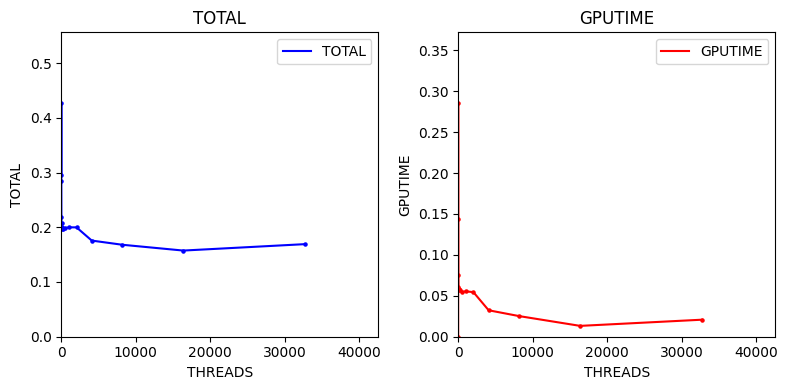

In [18]:
df = render_csv("./vmul/vmul.csv")
df["TOTAL"] = df["CPUTIME"] + df["HOST2GPU"] + df["GPUTIME"] + df["GPU2HOST"]
df = df.sort_values(by=["THREADS"], ascending=True)
display_df_mono(df)
plotPE(df=df, lines=True, what=[ ('THREADS', "TOTAL"), ('THREADS', "GPUTIME")], columns=2)